In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

2021-11-04 10:54:40.113913: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-04 10:54:40.114003: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


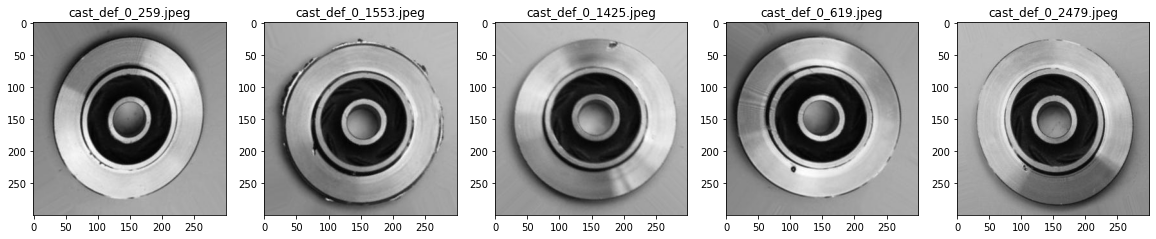

In [3]:
plt.figure(figsize=(20,20))
img_folder=r'/home/kp/kp/Defect/test/def_front'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [4]:
IMG_WIDTH=200
IMG_HEIGHT=200
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name

In [5]:
img_folder1=r'/home/kp/kp/Defect/train'
img_data, class_name =create_dataset(img_folder1)

In [6]:
img_folder2=r'/home/kp/kp/Defect/test'
img_data_test,class_name_test=create_dataset(img_folder2)

In [7]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict


{'def_front': 0, 'ok_front': 1}

In [8]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [9]:
x1=np.array(img_data,np.float32)
print(type(x1))
print(x1.shape)
x_train=x1[:,:,:,1]

<class 'numpy.ndarray'>
(6633, 200, 200, 3)


In [10]:
x2=np.array(img_data_test,np.float32)
print(type(x2))
print(x2.shape)
x_test=x2[:,:,:,1]

<class 'numpy.ndarray'>
(715, 200, 200, 3)


In [11]:
array11= np.zeros((3758,1),dtype=int)
array12=np.ones((2875,1),dtype=int)
y_train=np.append(array11,array12)
print(y_train.shape)

(6633,)


In [12]:
array21= np.zeros((453,1),dtype=int)
array22=np.ones((262,1),dtype=int)
y_test=np.append(array21,array22)
print(y_test.shape)

(715,)


<Figure size 432x288 with 0 Axes>

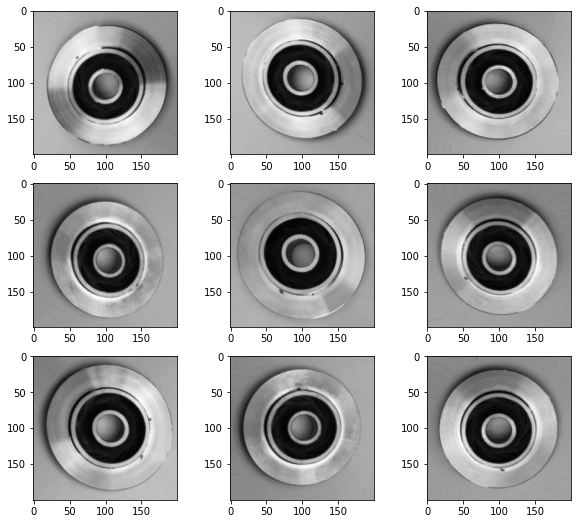

In [13]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])

In [14]:
for i in range(5):
    print(y_train[i])

0
0
0
0
0


In [15]:
print(x_train.min())
print(x_train.max())
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

0.0
1.0


In [16]:
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)
#X_train=X_train1.transpose()
#X_test=X_test1.transpose()

In [17]:
print(X_train.shape)
print(X_test.shape)

(6633, 40000)
(715, 40000)


In [18]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=2)

[1 1 0 ... 1 1 0]
(2, 40000)


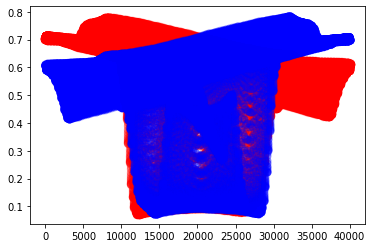

In [19]:
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs

kmeans_cluster_centers = np.sort(kmeans.cluster_centers_, axis = 0)
mbk_means_labels = pairwise_distances_argmin(X_train, kmeans_cluster_centers)
print(mbk_means_labels)
print(kmeans.cluster_centers_.shape)
x_da = [i for i in range(40000)]
plt.scatter(x_da,kmeans.cluster_centers_[0], color = 'red',alpha=0.2,s=70)
plt.scatter(x_da,kmeans.cluster_centers_[1] , color = 'blue',alpha=0.2,s=50)

In [20]:
kmeans.labels_

array([1, 0, 1, ..., 0, 1, 1], dtype=int32)

In [21]:
#from sklearn.cluster import KMeans
#means = KMeans(2)
#means.fit(X_train)

In [22]:
#identified_clusters = means.fit_predict(X_train)
#identified_clusters

In [23]:
#data_with_clusters = X_train.copy()
#data_with_clusters[2] = identified_clusters 
#plt.scatter(data_with_clusters[0],data_with_clusters[1],c=data_with_clusters['Clusters'],cmap='rainbow')

In [24]:
print(range(len(np.unique(kmeans.labels_))))
index = np.where(kmeans.labels_ == 1,1,0)
num = np.bincount(y_train[index==0]).argmax()
print(num)
print(index)

range(0, 2)
0
[1 0 1 ... 0 1 1]


In [25]:
def retrieve_info(cluster_labels,y_train):
    reference_labels = {}
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels
   

In [26]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
print(reference_labels)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
print(number_labels)

{0: 0, 1: 0}
[0. 0. 0. ... 0. 0. 0.]


In [27]:
print(number_labels[:6633].astype('int'))
print(y_train[:6633])

[0 0 0 ... 0 0 0]
[0 0 0 ... 1 1 1]


In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.5665611337253128


In [29]:
def calculate_metrics(model,output):
    print('Number of clusters is {}'.format(model.n_clusters))
    print('Inertia : {}'.format(model.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(output,model.labels_)))


In [30]:
from sklearn import metrics
cluster_number = [10,16,36,64,144,256]
for i in cluster_number:
    total_clusters = len(np.unique(y_test))
    kmeans = MiniBatchKMeans(n_clusters = i)
    kmeans.fit(X_train)
    kmeans.labels_
    reference_labels = retrieve_info(kmeans.labels_,y_train)
    print(reference_labels)
    calculate_metrics(kmeans,y_train)
    reference_labels = retrieve_info(kmeans.labels_,y_train)
    number_labels = np.random.rand(len(kmeans.labels_))
    
    for i in range(len(kmeans.labels_)):
        number_labels[i] = reference_labels[kmeans.labels_[i]]
    print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train)))
    print('\n')

{0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1, 9: 0}
Number of clusters is 10
Inertia : 4760183.0
Homogeneity: 0.05057120144888515
Accuracy score : 0.6120910598522539


{0: 1, 1: 1, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 1, 9: 0, 10: 0, 11: 0, 12: 0, 13: 1, 14: 1, 15: 0}
Number of clusters is 16
Inertia : 4429318.5
Homogeneity: 0.17958686548085034
Accuracy score : 0.7143072516206844


{0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 1, 11: 1, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 0, 25: 0, 26: 1, 27: 0, 28: 1, 29: 1, 30: 0, 31: 0, 32: 1, 33: 1, 34: 1, 35: 0}
Number of clusters is 36
Inertia : 3849421.0
Homogeneity: 0.3314590903788137
Accuracy score : 0.783355947535052


{0: 1, 1: 0, 2: 1, 3: 1, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0, 11: 1, 12: 0, 13: 0, 14: 1, 15: 0, 16: 0, 17: 0, 18: 1, 19: 1, 20: 1, 21: 1, 22: 0, 23: 0, 24: 1, 25: 1, 26: 0, 27: 1, 28: 1, 29: 1, 30: 1, 31: 0, 32: 1, 33: 1, 34: 0, 35: 1, 36: 

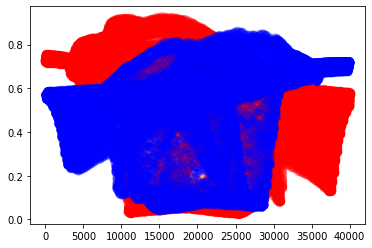

In [31]:
x_da = [i for i in range(40000)]
plt.scatter(x_da,kmeans.cluster_centers_[0], color = 'red',alpha=0.2,s=70)
plt.scatter(x_da,kmeans.cluster_centers_[1] , color = 'blue',alpha=0.2,s=50)

In [32]:
print(kmeans.labels_.shape)
len(np.unique(kmeans.labels_))
def retrieve_info1(cluster_labels,y_train):
    reference_labels = {}
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        if np.bincount(y_train[index==1]).size !=0:
            num = np.bincount(y_train[index==1]).argmax()
            reference_labels[i] = num
        else:
            reference_labels[i] = num
    return reference_labels
reference_labels = retrieve_info1(kmeans.labels_,y_test)

(6633,)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 715 but corresponding boolean dimension is 6633

In [33]:
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X_test)
calculate_metrics(kmeans,y_test)
reference_labels = retrieve_info1(kmeans.labels_,y_test)
print(len(reference_labels))
print(len(kmeans.labels_))

Number of clusters is 256
Inertia : 157951.28125
Homogeneity: 0.7799728613139069
251
715


In [196]:
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X_test)
calculate_metrics(kmeans,y_test)
reference_labels = retrieve_info(kmeans.labels_,y_test)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

Number of clusters is 256
Inertia : 171926.34106445312
Homogeneity: 0.7609726885259509
Accuracy score : 0.9216783216783216




In [197]:
centroids = kmeans.cluster_centers_
centroids.shape
centroids = centroids.reshape(256,200,200)


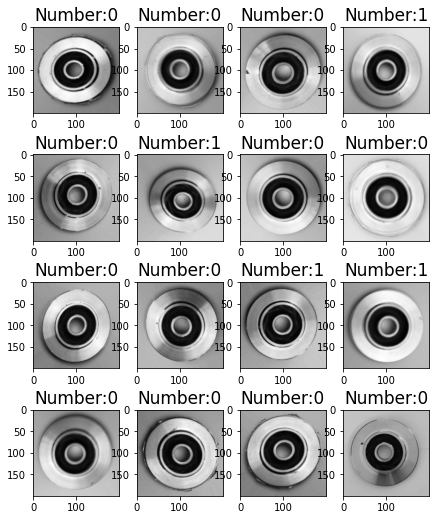

In [198]:
plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    plt.title('Number:{}'.format(reference_labels[i]),fontsize = 17)
    plt.imshow(centroids[i])

In [211]:
image=plt.imread('cast_def_0_7.jpeg')
image.shape
from skimage import color
from skimage import io
image = color.rgb2gray(io.imread('cast_def_0_7.jpeg'))
image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
image=np.array(image)
image = image.astype('float32')
image = image.reshape(1,200*200)
print(image.shape)

(1, 40000)


In [212]:
x_train = x_train.astype('float32')
x_train = x_train.reshape(6633,200*200)

In [213]:
kmeans = MiniBatchKMeans(n_clusters=256)
kmeans.fit(x_train)

MiniBatchKMeans(n_clusters=256)

In [214]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]

In [215]:
predicted_cluster = kmeans.predict(image)

In [216]:
number_labels[predicted_cluster]

array([0.])